In [1]:
import datetime
import os
from mdagent import MDAgent
import matplotlib.pyplot as plt

In [2]:
prompt19 = "Download the PDB for 2YXF. Tell me about its stability, as found in literature. Then, simulate it for 1ns and plot its RMSD over time."
llm_var = "gpt-4-1106-preview"
tools = "all"
agent = MDAgent(agent_type="Structured", model=llm_var, top_k_tools=tools)
now = datetime.datetime.now()
date = now.strftime("%Y-%m-%d")
print("date and time:",date)
time = now.strftime("%H:%M:%S")
print("time:",time)
print("LLM: ",agent.llm.model_name,"\nTemperature: ",agent.llm.temperature)

date and time: 2024-07-11
time: 15:56:22
LLM:  gpt-4-1106-preview 
Temperature:  0.1


In [3]:
agent.run(prompt19)

Thought: The task involves multiple steps: downloading the PDB file for the protein with PDB ID 2YXF, finding literature about its stability, simulating the protein for 1 nanosecond, and plotting its root mean square deviation (RMSD) over time. The first step is to download the PDB file for 2YXF. I will use the PDBFileDownloader tool to obtain the file.

Action:
```
{
  "action": "PDBFileDownloader",
  "action_input": {
    "query": "2YXF"
  }
}
```

PDB file found with this ID: 2YXF


2024-07-11 15:56:31.734 
  command:

    streamlit run /Users/jorgemedina/miniforge3/envs/mdagent2/lib/python3.11/site-packages/ipykernel_launcher.py [ARGUMENTS]


Now that I have the PDB file for 2YXF, the next step is to find literature about its stability. I will use the LiteratureSearch tool to find relevant information on the stability of the protein with PDB ID 2YXF.

Action:
```
{
  "action": "LiteratureSearch",
  "action_input": {
    "query": "2YXF protein stability"
  }
}
```"2YXF protein stability studies"
Search: "2YXF protein stability studies"


	Scraper openaccess failed on paper titled 'DynaMut2: Assessing changes in stability and flexibility upon single and multiple point missense mutations'.
Traceback (most recent call last):
  File "/Users/jorgemedina/miniforge3/envs/mdagent2/lib/python3.11/site-packages/paperscraper/scraper.py", line 82, in scrape
    result = await scraper.function(paper, path, **scraper.kwargs)
             ^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^
  File "/Users/jorgemedina/miniforge3/envs/mdagent2/lib/python3.11/site-packages/paperscraper/lib.py", line 300, in openaccess_scraper
    await link_to_pdf(url, path, session)
  File "/Users/jorgemedina/miniforge3/envs/mdagent2/lib/python3.11/site-packages/paperscraper/lib.py", line 133, in link_to_pdf
    r.raise_for_status()
  File "/Users/jorgemedina/miniforge3/envs/mdagent2/lib/python3.11/site-packages/aiohttp/client_reqrep.py", line 1070, in raise_for_status
    raise ClientResponseError(
aiohttp.client_exceptions.ClientResponseError: 403, 


Found 13 papers
The previous action to download the PDB file for 2YXF was successful, and the file ID is 2YXF_155632. The next step was to search the literature for information on the stability of 2YXF, but the tool could not provide an answer. Since the LiteratureSearch tool did not yield results, I will attempt the search again with a slightly modified query to see if it returns relevant information. If this attempt fails, I may need to consider alternative sources or methods to find information on the protein's stability.

Action:
```
{
  "action": "LiteratureSearch",
  "action_input": {
    "query": "protein 2YXF stability"
  }
}
```"2YXF protein stability study"
Search: "2YXF protein stability study"


	Scraper pubmed failed on paper titled 'Palmitoylation: policing protein stability and traffic'.
Traceback (most recent call last):
  File "/Users/jorgemedina/miniforge3/envs/mdagent2/lib/python3.11/site-packages/paperscraper/scraper.py", line 82, in scrape
    result = await scraper.function(paper, path, **scraper.kwargs)
             ^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^
  File "/Users/jorgemedina/miniforge3/envs/mdagent2/lib/python3.11/site-packages/paperscraper/lib.py", line 291, in pubmed_scraper
    await pubmed_to_pdf(pubmed_id, path, session)
  File "/Users/jorgemedina/miniforge3/envs/mdagent2/lib/python3.11/site-packages/paperscraper/lib.py", line 204, in pubmed_to_pdf
    raise RuntimeError(f"No PMC ID found for PubMed ID {pubmed_id}.")
RuntimeError: No PMC ID found for PubMed ID 17183362.
	Scraper openaccess failed on paper titled 'Protein stability and resistance to oxidative stress are determinants of longevity in the longest-living rodent, the naked mole-r


Found 17 papers
The LiteratureSearch tool has failed to provide information on the stability of protein 2YXF twice, indicating that the tool may not be able to retrieve the necessary literature. To proceed, I will attempt to use a broader search term that may yield results on the protein's stability. If this also fails, I will have to inform the user that the literature search was unsuccessful and move on to the simulation part of the task.

Action:
```
{
  "action": "LiteratureSearch",
  "action_input": {
    "query": "2YXF protein stability studies"
  }
}
```
"2YXF protein stability research papers"
Search: "2YXF protein stability research papers"


	Scraper openaccess failed on paper titled 'Novel antioxidants in food quality preservation and health promotion.'.
Traceback (most recent call last):
  File "/Users/jorgemedina/miniforge3/envs/mdagent2/lib/python3.11/site-packages/paperscraper/scraper.py", line 82, in scrape
    result = await scraper.function(paper, path, **scraper.kwargs)
             ^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^
  File "/Users/jorgemedina/miniforge3/envs/mdagent2/lib/python3.11/site-packages/paperscraper/lib.py", line 300, in openaccess_scraper
    await link_to_pdf(url, path, session)
  File "/Users/jorgemedina/miniforge3/envs/mdagent2/lib/python3.11/site-packages/paperscraper/lib.py", line 133, in link_to_pdf
    r.raise_for_status()
  File "/Users/jorgemedina/miniforge3/envs/mdagent2/lib/python3.11/site-packages/aiohttp/client_reqrep.py", line 1070, in raise_for_status
    raise ClientResponseError(
aiohttp.client_exceptions.ClientResponseError: 403, message='Forbidden', url=URL('https:/


Found 10 papers
The LiteratureSearch tool has been unable to provide information on the stability of protein 2YXF after several attempts with different queries. It seems that this tool may not have access to the specific literature needed or there may be limitations in retrieving the information. Therefore, I will proceed to the next part of the task, which is to simulate the protein for 1 nanosecond and plot its RMSD over time. To do this, I will use the SetUpandRunFunction tool to set up and run the simulation.

Action:
```
{
  "action": "SetUpandRunFunction",
  "action_input": {
    "pdb_id": "2YXF_155632",
    "forcefield_files": ["amber99sbildn.xml", "tip3p.xml"],
    "system_params": {
      "nonbondedMethod": "PME",
      "nonbondedCutoff": "1 * nanometers",
      "constraints": "HBonds",
      "rigidWater": true,
      "constraintTolerance": 0.00001,
      "solvate": true
    },
    "integrator_params": {
      "integrator_type": "LangevinMiddle",
      "Temperature": "300 * k

("The PDB file for protein 2YXF was successfully downloaded and cleaned to add missing hydrogen atoms. However, the LiteratureSearch tool was unable to find information about the protein's stability. The molecular dynamics simulation was then successfully set up and run for 1 nanosecond. The RMSD over time was calculated and plotted, with the results saved to a CSV file (ID: rmsd_160149) and the plot saved with the ID fig0_180943.",
 '6TKYTTFY')

In [4]:
now = datetime.datetime.now()
date = now.strftime("%Y-%m-%d")
print("date and time:",date)
time = now.strftime("%H:%M:%S")
print("time:",time)
registry = agent.path_registry
paths_and_descriptions = registry.list_path_names_and_descriptions()
print("\n".join(paths_and_descriptions.split(",")))

date and time: 2024-07-11
time: 18:09:52
Files found in registry: 2YXF_155632: PDB file downloaded from RSCB
 PDBFile ID: 2YXF_155632
 2YXF_160135: Cleaned File:  Removed Heterogens
 and Water Removed.  Replaced Nonstandard Residues. Added Hydrogens at pH 7.0. Missing Atoms Added and replaces nonstandard residues. 
 top_sim0_160149: Initial positions for simulation sim0_160149
 sim0_160149: Basic Simulation of Protein 2YXF_160135
 rec0_160151: Simulation trajectory for protein 2YXF_160135 and simulation sim0_160149
 rec1_160151: Simulation state log for protein 2YXF_160135 and simulation sim0_160149
 rec2_160151: Simulation pdb frames for protein 2YXF_160135 and simulation sim0_160149
 rmsd_160149: RMSD for 160149
 fig0_180943: RMSD plot for 160149


In [8]:
print("Agent answer on Stabiltiy:However, the LiteratureSearch tool was unable to find information about the protein's stability.")

Agent answer on Stabiltiy:However, the LiteratureSearch tool was unable to find information about the protein's stability.


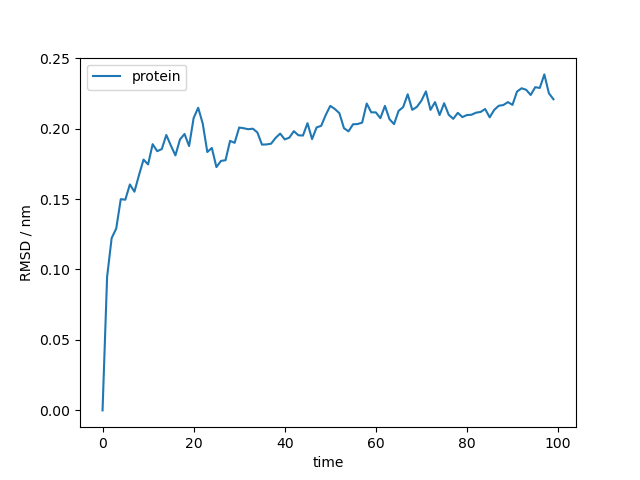

In [7]:
path_rmsd = registry.get_mapped_path("fig0_180943")
from IPython.display import Image
Image(filename=path_rmsd)

# Experiment Result:
### Completed without Exception or TimeOut Errors ✅  
### Attempted all necessary steps ✅  
### Logic make sense  ✅  
### Correct Answer  ✅  